<a href="https://colab.research.google.com/github/SaniyaGapchup/Stress-Detection/blob/main/stress_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=771934de3bc52c788c532808709ac17ee39356b6b6cb855c88e2a0de5f02024e
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(port='8501')
public_url

<NgrokTunnel: "http://f8a8-35-188-228-25.ngrok.io" -> "http://localhost:80">

In [ ]:
%%writefile stramlit_app.py
import streamlit as st
import pandas as pd
import numpy as np
data = pd.read_csv("dreaddit-test1.csv")
print(data.head())
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

import pandas as pd
data = pd.read_csv("dreaddit-test1.csv")
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head())

import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)


from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Writing stramlit_app.py


In [ ]:
!streamlit run /content/streamlit_app.py & npx localtunnel - port 8501

/bin/bash: streamlit: command not found
npx: installed 22 in 1.972s
Usage: lt --port [num] <options>

Options:
  -p, --port                Internal HTTP server port                 [required]
  -h, --host                Upstream server providing forwarding
                                             [default: "https://localtunnel.me"]
  -s, --subdomain           Request this subdomain
  -l, --local-host          Tunnel traffic to this host instead of localhost,
                            override Host header to this host
      --local-https         Tunnel traffic to a local HTTPS server     [boolean]
      --local-cert          Path to certificate PEM file for local HTTPS server
      --local-key           Path to certificate key file for local HTTPS server
      --local-ca            Path to certificate authority file for self-signed
                            certificates
      --allow-invalid-cert  Disable certificate checks for your local HTTPS
                            server

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv("dreaddit-test1.csv")
print(data.head())

      id      subreddit post_id sentence_range  \
0    896  relationships  7nu7as       [50, 55]   
1  19059        anxiety  680i6d        (5, 10)   
2   7977           ptsd  8eeu1t        (5, 10)   
3   1214           ptsd  8d28vu         [2, 7]   
4   1965  relationships  7r1e85       [23, 28]   

                                                text  label  confidence  \
0  Its like that, if you want or not.“ ME: I have...      0         0.8   
1  I man the front desk and my title is HR Custom...      0         1.0   
2  We'd be saving so much money with this new hou...      1         1.0   
3  My ex used to shoot back with "Do you want me ...      1         0.5   
4  I haven’t said anything to him yet because I’m...      0         0.8   

   social_timestamp  social_karma  syntax_ari  ...  lex_dal_min_pleasantness  \
0        1514980773            22   -1.238793  ...                    1.0000   
1        1493348050             5    7.684583  ...                    1.4000   
2       

In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


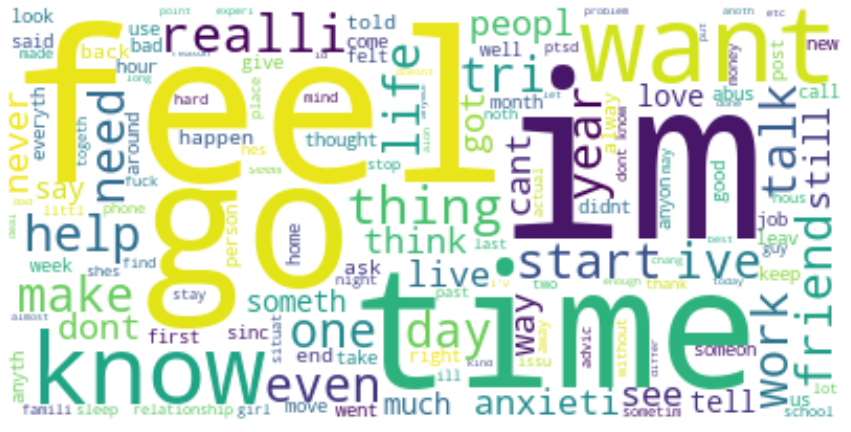

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import pandas as pd
data = pd.read_csv("dreaddit-test1.csv")
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head())

                                                text      label
0  Its like that, if you want or not.“ ME: I have...  No Stress
1  I man the front desk and my title is HR Custom...  No Stress
2  We'd be saving so much money with this new hou...     Stress
3  My ex used to shoot back with "Do you want me ...     Stress
4  I haven’t said anything to him yet because I’m...  No Stress


In [ ]:
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.33,
                                                random_state=42)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: People need to take care of their mental health
['No Stress']


In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)